## Dataloader analysis

In [18]:
from dataset import MazeDataset
import torch
import pandas as pd
from sklearn.model_selection import train_test_split

path = 'data/mazes_cont50k_noExit_biasedL90R10.csv'
imgs = pd.read_csv(path, header=None)#.values


# train_dataset = MazeDataset(imgs[:40000])
# val_dataset = MazeDataset(imgs[40000:45000])
# test_dataset = MazeDataset(imgs[45000:])


In [19]:
imgs = imgs.sample(frac=1).reset_index(drop=True)
ds = MazeDataset(imgs.values)
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(ds, [40000, 5000, 5000])

In [20]:
imgs.to_csv('data/mazes_cont50k_noExit_biasedL90R10.csv', header=None, index=None)

---

## Biased dataset: 1 corridor

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/mazes_2gf_continuous_big_noExit.csv', header=None)

df

,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,169
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,7.823675
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,6.315308
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,5.352287
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.770825
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,6.931807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,7.688400
149996,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,6.432879
149997,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,5.092037
149998,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,3.960419


In [4]:
df.iloc[:,169].describe()

count    150000.000000
mean          3.996020
std           2.312144
min           0.000019
25%           1.990787
50%           3.994883
75%           5.995381
max           7.999991
Name: 169, dtype: float64

In [6]:
df[(df.iloc[:,169] > 4)].shape

(74916, 170)

5.035339056838658


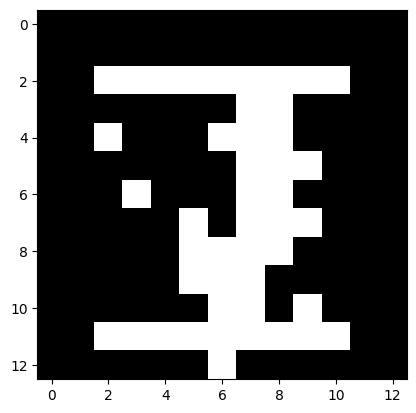

In [26]:
idx = 31450
#datapoint = df[(df.iloc[:,169] > 6) & (df.iloc[:,169] < 6.5)].reset_index(drop=1).iloc[idx,:].values.squeeze()
datapoint = df.iloc[idx,:].values.squeeze()
a = datapoint[:-1].reshape(13,13)
print(datapoint[-1])
plt.imshow(
    a,
    cmap='binary'
);

In [2]:
left_corridor = df[(df.iloc[:,169] < 4)].reset_index(drop=1).sample(45000)
right_corridor = df[(df.iloc[:,169] >= 4)].reset_index(drop=1).sample(5000)

In [4]:
pd.concat([left_corridor, right_corridor], axis=0).sample(frac=1).to_csv('data/mazes_cont50k_noExit_biasedL90R10_1.csv', header=None, index=None)

---

## Biased dataset: 2 corridors

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/mazes_200k_2corridors_13x13.csv', header=None)

df

,0,1,2,3,4,5,6,7,8,9,...,161,162,163,164,165,166,167,168,169,170
0,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,12,4
1,1,1,1,0,0,1,0,1,1,1,...,0,0,0,1,1,1,1,1,4,5
2,1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,1,0,1,1,11,9
3,1,0,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,3,11
4,1,1,1,1,0,0,1,0,0,1,...,0,0,1,1,1,1,1,1,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,0,2,12
199996,1,1,1,1,0,0,1,0,0,1,...,1,1,1,1,0,0,1,1,4,10
199997,1,0,1,1,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,5,2
199998,0,0,0,1,1,1,1,0,1,1,...,0,1,0,1,1,1,1,1,0,4


In [10]:
169*1000

169000

### Bias on aligned corridors

In [18]:
a = df[(df.iloc[:, 170] <= df.iloc[:, 169]+1) & (df.iloc[:, 170] >= df.iloc[:, 169]-1)]#.sample(4370 * 5)
b = df.loc[df.index.difference(a.index), :].sample(13200)

In [20]:
a.groupby([169,170]).count()

0     1     2     3     4     5     6     7     8     9    ...  \
169 170                                                              ...   
0   0    1206  1206  1206  1206  1206  1206  1206  1206  1206  1206  ...   
    1    1212  1212  1212  1212  1212  1212  1212  1212  1212  1212  ...   
1   0    1177  1177  1177  1177  1177  1177  1177  1177  1177  1177  ...   
    1    1184  1184  1184  1184  1184  1184  1184  1184  1184  1184  ...   
    2    1171  1171  1171  1171  1171  1171  1171  1171  1171  1171  ...   
2   1    1217  1217  1217  1217  1217  1217  1217  1217  1217  1217  ...   
    2    1172  1172  1172  1172  1172  1172  1172  1172  1172  1172  ...   
    3    1198  1198  1198  1198  1198  1198  1198  1198  1198  1198  ...   
3   2    1189  1189  1189  1189  1189  1189  1189  1189  1189  1189  ...   
    3    1177  1177  1177  1177  1177  1177  1177  1177  1177  1177  ...   
    4    1168  1168  1168  1168  1168  1168  1168  1168  1168  1168  ...   
4   3    1233  1233  1233  1233  1233  1233  1233  1233  1233  1233  ...   
    4    1184  1184  1184  1184  1184  1184  1184  1184  1184  1184  ...   
    5    1181  1181  1181  1181  1181  1181  1181  1181  1181  1181  ...   
5   4    1164  1164  1164  1164  1164  1164  1164  1164  1164  1164  ...   
    5    1142  1142  1142  1142  1142  1142  1142  1142  1142  1142  ...   
    6    1222  1222  1222  1222  1222  1222  1222  1222  1222  1222  ...   
6   5    1222  1222  1222  1222  1222  1222  1222  1222  1222  1222  ...   
    6    1169  1169  1169  1169  1169  1169  1169  1169  1169  1169  ...   
    7    1165  1165  1165  1165  1165  1165  1165  1165  1165  1165  ...   
7   6    1186  1186  1186  1186  1186  1186  1186  1186  1186  1186  ...   
    7    1235  1235  1235  1235  1235  1235  1235  1235  1235  1235  ...   
    8    1182  1182  1182  1182  1182  1182  1182  1182  1182  1182  ...   
8   7    1192  1192  1192  1192  1192  1192  1192  1192  1192  1192  ...   
    8    1179  1179  1179  1179  1179  1179  1179  1179  1179  1179  ...   
    9    1175  1175  1175  1175  1175  1175  1175  1175  1175  1175  ...   
9   8    1251  1251  1251  1251  1251  1251  1251  1251  1251  1251  ...   
    9    1180  1180  1180  1180  1180  1180  1180  1180  1180  1180  ...   
    10   1111  1111  1111  1111  1111  1111  1111  1111  1111  1111  ...   
10  9    1185  1185  1185  1185  1185  1185  1185  1185  1185  1185  ...   
    10   1173  1173  1173  1173  1173  1173  1173  1173  1173  1173  ...   
    11   1245  1245  1245  1245  1245  1245  1245  1245  1245  1245  ...   
11  10   1162  1162  1162  1162  1162  1162  1162  1162  1162  1162  ...   
    11   1177  1177  1177  1177  1177  1177  1177  1177  1177  1177  ...   
    12   1126  1126  1126  1126  1126  1126  1126  1126  1126  1126  ...   
12  11   1154  1154  1154  1154  1154  1154  1154  1154  1154  1154  ...   
    12   1132  1132  1132  1132  1132  1132  1132  1132  1132  1132  ...   

          159   160   161   162   163   164   165   166   167   168  
169 170                                                              
0   0    1206  1206  1206  1206  1206  1206  1206  1206  1206  1206  
    1    1212  1212  1212  1212  1212  1212  1212  1212  1212  1212  
1   0    1177  1177  1177  1177  1177  1177  1177  1177  1177  1177  
    1    1184  1184  1184  1184  1184  1184  1184  1184  1184  1184  
    2    1171  1171  1171  1171  1171  1171  1171  1171  1171  1171  
2   1    1217  1217  1217  1217  1217  1217  1217  1217  1217  1217  
    2    1172  1172  1172  1172  1172  1172  1172  1172  1172  1172  
    3    1198  1198  1198  1198  1198  1198  1198  1198  1198  1198  
3   2    1189  1189  1189  1189  1189  1189  1189  1189  1189  1189  
    3    1177  1177  1177  1177  1177  1177  1177  1177  1177  1177  
    4    1168  1168  1168  1168  1168  1168  1168  1168  1168  1168  
4   3    1233  1233  1233  1233  1233  1233  1233  1233  1233  1233  
    4    1184  1184  1184  1184  1184  1184  1184  1184  1184  11

In [19]:
b.groupby([169,170]).count()

0    1    2    3    4    5    6    7    8    9    ...  159  160  161  \
169 170                                                    ...                  
0   2     99   99   99   99   99   99   99   99   99   99  ...   99   99   99   
    3    104  104  104  104  104  104  104  104  104  104  ...  104  104  104   
    4    124  124  124  124  124  124  124  124  124  124  ...  124  124  124   
    5     95   95   95   95   95   95   95   95   95   95  ...   95   95   95   
    6    120  120  120  120  120  120  120  120  120  120  ...  120  120  120   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
12  6     91   91   91   91   91   91   91   91   91   91  ...   91   91   91   
    7    104  104  104  104  104  104  104  104  104  104  ...  104  104  104   
    8     89   89   89   89   89   89   89   89   89   89  ...   89   89   89   
    9     94   94   94   94   94   94   94   94   94   94  ...   94   94   94   
    10   102  102  102  102  102  102  102  102  102  102  ...  102  102  102   

         162  163  164  165  166  167  168  
169 170                                     
0   2     99   99   99   99   99   99   99  
    3    104  104  104  104  104  104  104  
    4    124  124  124  124  124  124  124  
    5     95   95   95   95   95   95   95  
    6    120  120  120  120  120  120  120  
...      ...  ...  ...  ...  ...  ...  ...  
12  6     91   91   91   91   91   91   91  
    7    104  104  104  104  104  104  104  
    8     89   89   89   89   89   89   89  
    9     94   94   94   94   94   94   94  
    10   102  102  102  102  102  102  102  

[132 rows x 169 columns]

In [21]:
a.shape[0]+b.shape[0]

56998

In [9]:
4370*(1+5)

26220

In [22]:
pd.concat([a, b], axis=0).reset_index(drop=1).sample(frac=1).to_csv('data/mazes_57k_2corridors_AlignedBias.csv', header=None, index=None)

### Bias on bottom corridor

In [18]:
a = df[df.iloc[:, 170] <= 6].sample(92000)#.groupby([169, 170]).count()
b = df[df.iloc[:, 170] > 6].sample(8000)#.groupby([169, 170]).count()

In [20]:
pd.concat([a, b], axis=0).reset_index(drop=1).sample(frac=1).to_csv('data/mazes_100k_2corridors_UpperBiasL1000R100.csv', header=None, index=None)

In [7]:
df[(df.iloc[:,169] > 6) & (df.iloc[:,170] > 6)].shape

(42502, 171)

In [ ]:
left_corridor = df[(df.iloc[:,169] < 4)].reset_index(drop=1).sample(45000)
right_corridor = df[(df.iloc[:,169] >= 4)].reset_index(drop=1).sample(5000)

[12  7]


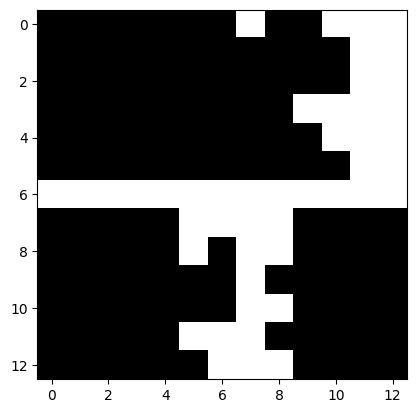

In [4]:
idx = 4202
datapoint = df[(df.iloc[:,169] > 4) & (df.iloc[:,170] > 4)].reset_index(drop=1).iloc[idx,:].values.squeeze()
#datapoint = df.iloc[idx,:].values.squeeze()
a = datapoint[:-2].reshape(13,13)
print(datapoint[-2:])
plt.imshow(
    a,
    cmap='binary'
);

---

## Remove exit

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/mazes_2gf_continuous_big_exit2pixels.csv', header=None)

df

,0,1,2,3,4,5,6,7,8,9,...,161,162,163,164,165,166,167,168,169,170
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,7.823675,7.0
1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,6.315308,1.0
2,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,5.352287,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.770825,7.0
4,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,6.931807,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,7.688400,4.0
149996,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,6.432879,1.0
149997,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,5.092037,4.0
149998,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,3.960419,1.0


In [2]:
imgs = df.values
imgs[:, :26] = 1.


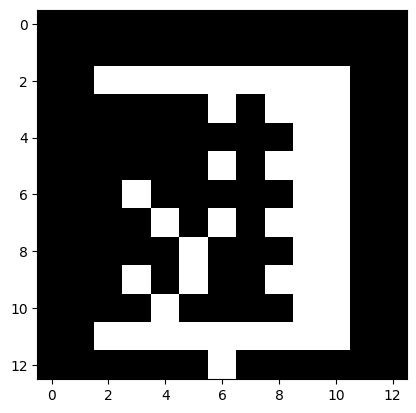

In [3]:
plt.imshow(imgs[0, :-2].reshape(13,13), cmap='binary')

In [6]:
pd.DataFrame(imgs[:, :-1]).to_csv('data/mazes_2gf_continuous_big_noExit.csv', header=None, index=None)

---

## Relabel discrete datasets

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/mazes_2gf_discrete.csv', header=None)

df

,0,1,2,3,4,5,6,7,8,9,...,161,162,163,164,165,166,167,168,169,170
0,1,1,1,1,1,1,0,1,1,1,...,1,0,1,1,1,1,1,1,0,1
1,1,1,1,0,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,2,0
2,1,1,1,1,1,1,1,1,1,0,...,1,0,1,1,1,1,1,1,2,2
3,1,1,1,1,1,1,1,1,1,0,...,1,0,1,1,1,1,1,1,0,2
4,1,1,1,1,1,1,0,1,1,1,...,1,0,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1,1,1,0,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,0,0
29996,1,1,1,0,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,0,0
29997,1,1,1,0,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,0,0
29998,1,1,1,1,1,1,1,1,1,0,...,1,0,1,1,1,1,1,1,0,2


In [ ]:
import torch
import pandas as pd

def process_label(labels):
    if len(labels.shape) == 1:
        labels = labels.reshape(1, -1)
    l = pd.DataFrame(labels, columns=['corridor', 'exit'], dtype=str)
    l = l.corridor.map(int2label) + l.exit.map(int2label)
    l = l.map(label2idx).values
    #l = torch.tensor(l)
    return l

int2label = {
    '0':'l',
    '1':'c',
    '2':'r',
}

label2idx = {
    'll': 0,
    'cl': 1,
    'rl': 2,
    'lc': 3,
    'cc': 4,
    'rc': 5,
    'lr': 6,
    'cr': 7,
    'rr': 8,
}

In [ ]:
l = process_label(df.iloc[:,-2:].values)

In [ ]:
pd.concat([df.iloc[:,:-2], pd.Series(l)], axis=1)#.to_csv('data/mazes_2gf_discrete_relabelled.csv', header=False, index=False)

---

## Other

In [1]:
import pandas as pd

df = pd.read_csv("data/mazes_500k_2corridors_13x13.csv", header=None)

In [3]:
df.sample(200_000).to_csv("data/mazes_200k_2corridors_13x13.csv", header=None, index=None)